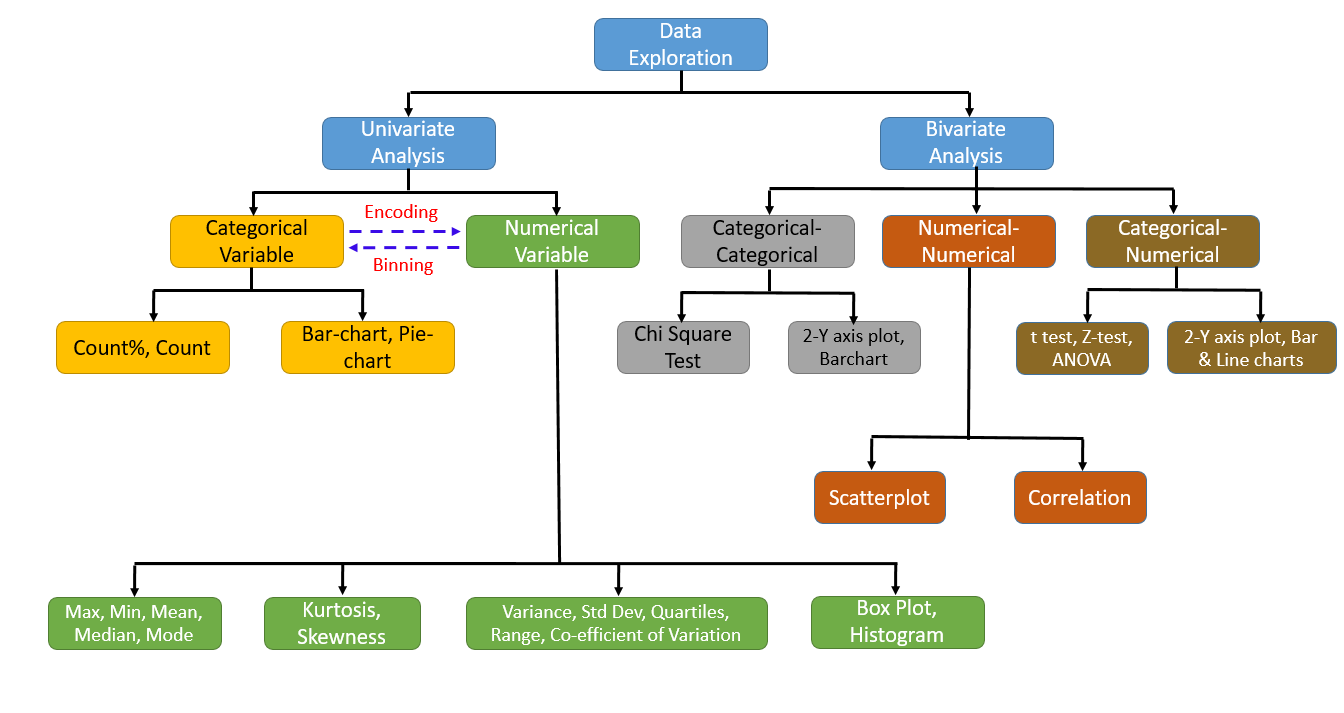

In [76]:
from IPython.display import Image
Image(filename="Downloads/EDA_Diagram.png")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Univariate Analysis

## Categorical Variables

In [38]:
df = pd.read_csv('iris.csv')
df.shape
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.groupby(['Species']).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [4]:
freq_table = df.groupby(['Species']).size().reset_index(name='Count').rename(columns={'Sepcies':'Species'})
freq_table

,Species,Count
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


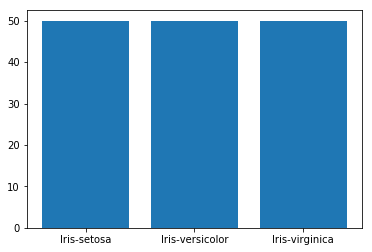

In [5]:
plt.bar(freq_table['Species'], freq_table['Count'])
plt.show()

In [6]:
freq_table['Count%'] = freq_table['Count']/sum(freq_table['Count'])*100
freq_table

,Species,Count,Count%
0,Iris-setosa,50,33.333333
1,Iris-versicolor,50,33.333333
2,Iris-virginica,50,33.333333


## Numerical Variables

In [7]:
df.groupby(['SepalLengthCm']).size().reset_index(name='Count').rename(columns={'SepalLengthCm':'SepalLengthCm'})

,SepalLengthCm,Count
0,4.3,1
1,4.4,3
2,4.5,1
3,4.6,4
4,4.7,2
5,4.8,5
6,4.9,6
7,5.0,10
8,5.1,9
9,5.2,4


Text(0, 0.5, 'Count')

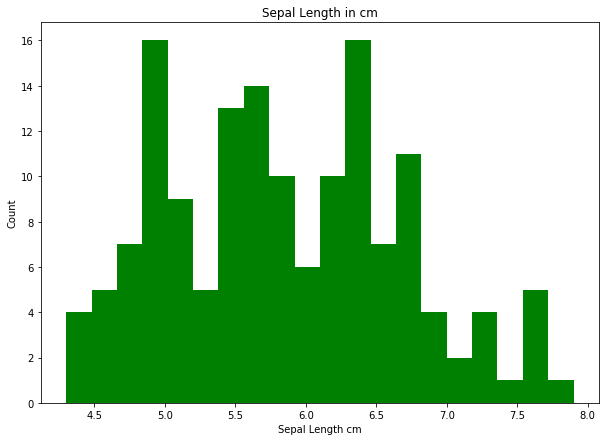

In [9]:
plt.figure(figsize = (10,7))
x = df["SepalLengthCm"]
plt.hist(x, bins=20, color="green")
plt.title("Sepal Length in cm")
plt.xlabel("Sepal Length cm")
plt.ylabel("Count")

In [10]:
new_df = df[["SepalLengthCm","SepalWidthCm", "PetalLengthCm","PetalWidthCm"]]
new_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


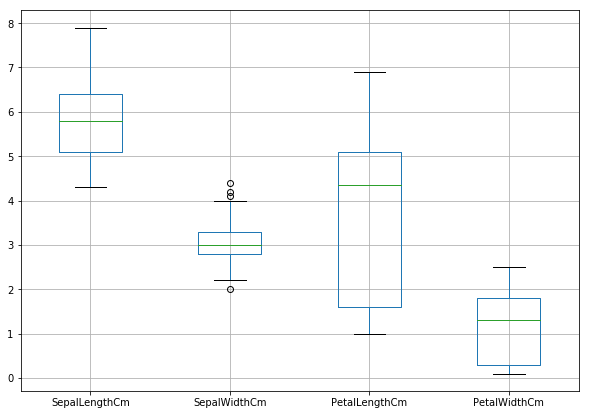

In [11]:
plt.figure(figsize = (10,7))
new_df.boxplot()

In [16]:
df["SepalLengthCm"].median()

5.8

In [17]:
np.percentile(df.SepalLengthCm, 25)

5.0999999999999996

In [18]:
np.percentile(df.SepalLengthCm, 75)

6.4000000000000004

## Binning or Discretization

In [39]:
sepal_length_ranges = ["[{0} - {1})".format(SepalLengthCm, SepalLengthCm + 1.0) for SepalLengthCm in range(4, 8, 1)]
sepal_length_ranges

['[4 - 5.0)', '[5 - 6.0)', '[6 - 7.0)', '[7 - 8.0)']

In [40]:
count_sepal_length_ranges = len(sepal_length_ranges)
count_sepal_length_ranges

4

In [41]:
df['SepalLengthCm_Range'] = pd.cut(x=df['SepalLengthCm'], bins=count_sepal_length_ranges, labels=sepal_length_ranges)

In [42]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthCm_Range
0,1,5.1,3.5,1.4,0.2,Iris-setosa,[4 - 5.0)
1,2,4.9,3.0,1.4,0.2,Iris-setosa,[4 - 5.0)
2,3,4.7,3.2,1.3,0.2,Iris-setosa,[4 - 5.0)
3,4,4.6,3.1,1.5,0.2,Iris-setosa,[4 - 5.0)
4,5,5.0,3.6,1.4,0.2,Iris-setosa,[4 - 5.0)


In [43]:
sepal_len_hist_df = df['SepalLengthCm_Range'].value_counts()
sepal_len_hist_df

[5 - 6.0)    50
[4 - 5.0)    45
[6 - 7.0)    43
[7 - 8.0)    12
Name: SepalLengthCm_Range, dtype: int64

In [44]:
df_range_hist = pd.DataFrame(sepal_len_hist_df).reset_index()
df_range_hist.columns = ['SepalLengthCm_Range', 'Count']
df_range_hist

,SepalLengthCm_Range,Count
0,[5 - 6.0),50
1,[4 - 5.0),45
2,[6 - 7.0),43
3,[7 - 8.0),12


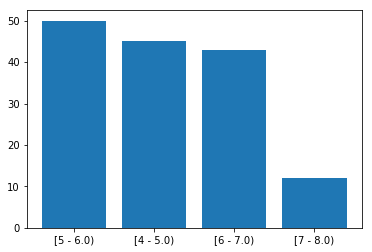

In [53]:
plt.bar(df_range_hist["SepalLengthCm_Range"], df_range_hist["Count"])
plt.show()

# Bi-Variate Analysis

## Numerical-Numerical Variable Analysis

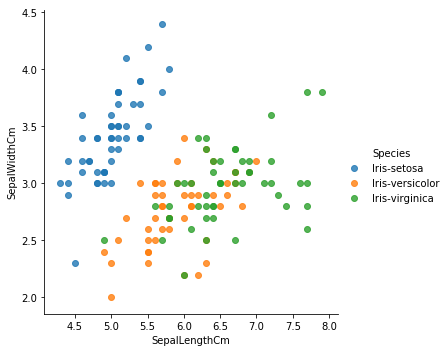

In [56]:
#Scatter Plot
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', fit_reg=False, data=df)

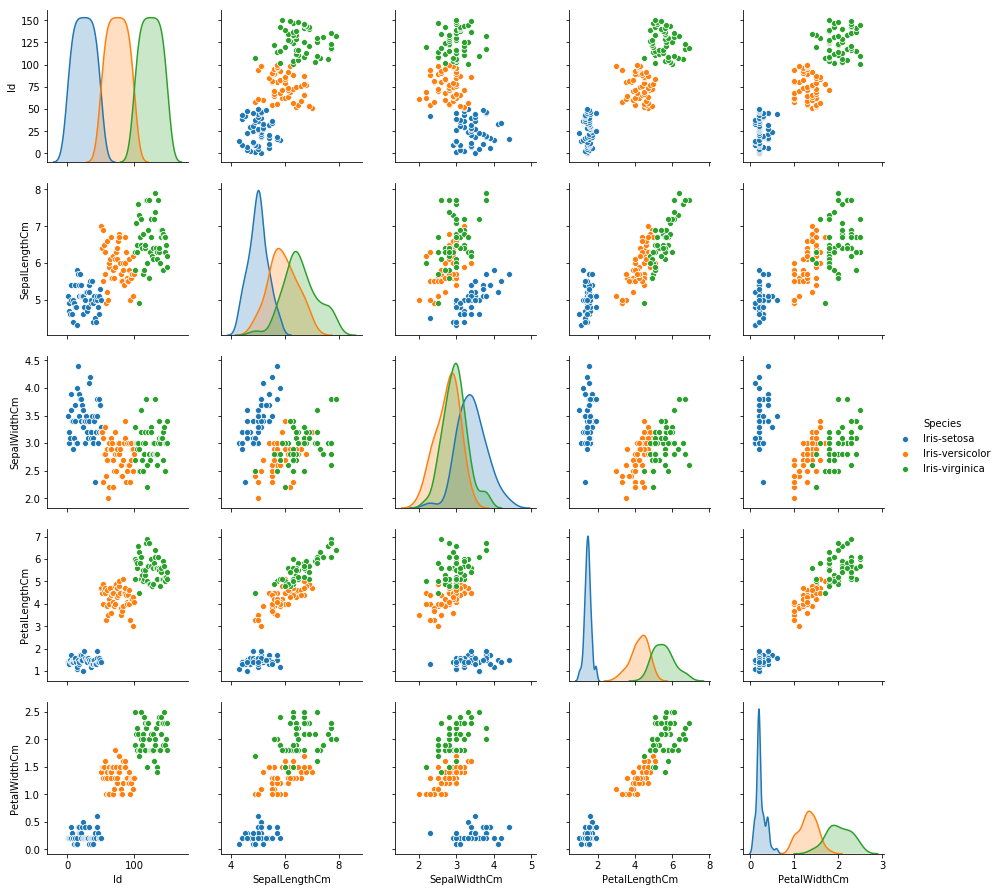

In [57]:
#Scatter Plot Matrix
sns.pairplot(hue='Species', data=df)

In [58]:
#Correlation 
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


## Categorical-Categorical Variable Analysis

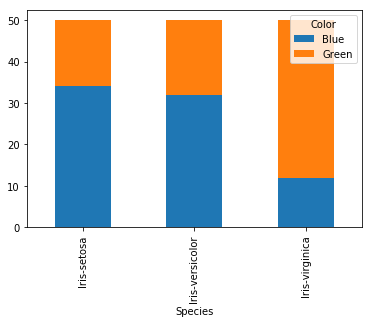

In [63]:
df2 = pd.read_csv('iris_with_colors.csv')
df_plot = df2.groupby(['Color', 'Species']).size().reset_index().pivot(columns='Color', index='Species', values=0)
df_plot.plot(x=df_plot.index, kind='bar', stacked=True)

In [64]:
pd.crosstab(df2.Species,df2.Color)

Color,Blue,Green
Species,,
Iris-setosa,34,16
Iris-versicolor,32,18
Iris-virginica,12,38


In [65]:
df_mean = df.groupby(['Species']).mean().reset_index()
df_mean

,Species,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,Iris-setosa,25.5,5.006,3.418,1.464,0.244
1,Iris-versicolor,75.5,5.936,2.770,4.260,1.326
2,Iris-virginica,125.5,6.588,2.974,5.552,2.026


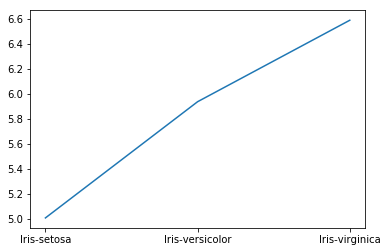

In [66]:
plt.plot(df_mean['Species'], df_mean['SepalLengthCm'])

In [68]:
df_mean = df.groupby(['Species']).mean().reset_index()
df_var = df.groupby(['Species']).var().reset_index()
z = (5.006 - 5.936)/np.sqrt(np.square(0.1242)/50 + np.square(0.266433)/50)
z

-22.370745708143382

## Numerical-Categorical Variable Analysis

In [70]:
df_mean = df.groupby(['Species']).mean().reset_index().drop(['Id'], axis=1).add_prefix('mean_')
df_var = df.groupby(['Species']).var().reset_index().drop(['Id','Species'], axis=1).add_prefix('var_')
df_count = df.groupby(['Species']).count().reset_index().drop(['Id', 'Species'], axis=1).add_prefix('count_')
pd.concat([df_mean, df_var, df_count], axis=1)


,mean_Species,mean_SepalLengthCm,mean_SepalWidthCm,mean_PetalLengthCm,mean_PetalWidthCm,var_SepalLengthCm,var_SepalWidthCm,var_PetalLengthCm,var_PetalWidthCm,count_SepalLengthCm,count_SepalWidthCm,count_PetalLengthCm,count_PetalWidthCm,count_SepalLengthCm_Range
0,Iris-setosa,5.006,3.418,1.464,0.244,0.124249,0.145180,0.030106,0.011494,50,50,50,50,50
1,Iris-versicolor,5.936,2.770,4.260,1.326,0.266433,0.098469,0.220816,0.039106,50,50,50,50,50
2,Iris-virginica,6.588,2.974,5.552,2.026,0.404343,0.104004,0.304588,0.075433,50,50,50,50,50


In [71]:
k=3
N = 50+50+50
Numerator = np.sum([np.square(5.006-5.843)/(k-1), np.square(5.936-5.843)/(k-1), np.square(6.588-5.843)/(k-1)])
Numerator

0.63212149999999989

In [72]:
Setosa = np.sum(np.square(df[df['Species'] == 'Iris-setosa'].SepalLengthCm - 5.006)/(N-k))
Versicolor = np.sum(np.square(df[df['Species'] == 'Iris-versicolor'].SepalLengthCm - 5.936)/(N-k))
Verginica = np.sum(np.square(df[df['Species'] == 'Iris-virginica'].SepalLengthCm - 6.588)/(N-k))
Denominator = Setosa+Versicolor+Verginica
Denominator

0.26500816326530613

In [73]:
F = Numerator/Denominator
F

2.3852906726015366

In [ ]:
#Link to Calculate F-Statistics
http://onlinestatbook.com/2/calculators/F_dist.html